# Auswertung Gemeinderat

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/Gemeinde_Exekutive - daten.csv')

In [3]:
# Add Jahrgang
df['Alter'] = df.apply(lambda row: 2020 - row['Jahrgang'] if row['Jahrgang'] > 0 else row['Alter'], axis=1)

In [4]:
# Add partei_clean

def transform_partei(p):
    if p in ['parteilos', 'FDP', 'EVP', 'SVP', 'SP', 'CVP', 'glp', 'EVP', 'Grüne', 'BDP', 'AL']:
        return p
    return 'verschiedene'

df['partei_c'] = df['Partei'].apply(transform_partei)

## Die grössten Parteien

In [73]:
grPartei = df.groupby('partei_c').agg({'Gemeinde': 'count'}).sort_values('Gemeinde', ascending=False)
grPartei['prozent'] = round(100 / df['Gemeinde'].count() * grPartei.Gemeinde, 1)

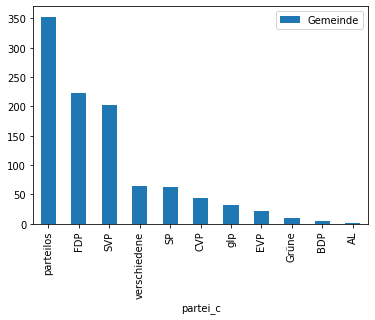

In [74]:
grPartei.plot.bar(y = 'Gemeinde')

### In Prozent

In [75]:
grPartei

,Gemeinde,prozent
partei_c,,
parteilos,353,34.7
FDP,222,21.9
SVP,202,19.9
verschiedene,64,6.3
SP,63,6.2
CVP,44,4.3
glp,32,3.1
EVP,21,2.1
Grüne,10,1.0


## Geschlecht

In [76]:
grGender = df.groupby('Geschlecht').agg({'Name': 'count'})
grGender['prozent'] = round(100 / len(df) * grGender.Name, 1)
grGender

,Name,prozent
Geschlecht,,
m,741,72.9
w,275,27.1


## Der Durchschnitts-Gemeinderat (m/w) ist...

In [77]:
df_alter = df[df.Alter.notna()]
print("Männlich")
print("%s Jahre alt" % round(df_alter.Alter.mean()))
print("parteilos")


Männlich
55.0 Jahre alt
parteilos


## Die Durchschnitts-Gemeinderätin ist...

In [78]:
df_alter = df[df.Alter.notna()]
print("%s Jahre alt" % round(df_alter[df_alter.Geschlecht == 'w'].Alter.mean()))
print("parteilos")

54.0 Jahre alt
parteilos


## Die Durchschnitts-Gemeinderät (m) ist...

In [93]:
df_alter = df[df.Alter.notna()]
print("%s Jahre alt" % round(df_alter[df_alter.Geschlecht == 'm'].Alter.mean()))
print("parteilos")

55.0 Jahre alt
parteilos


## Gendereinsitige Gemeinderäte

In [98]:
df_g = pd.pivot_table(df, 'Name', 'Gemeinde', columns='Geschlecht', aggfunc='count')
df_g['w'] = df_g['w'].fillna(0)
df_g['total'] = df_g.m + df_g.w
df_g['m%'] = round(100 / df_g.total * df_g.m)
df_g['w%'] = round(100 / df_g.total * df_g.w)
df_g.sort_values('m%', ascending=False).head(10)

Geschlecht,m,w,total,m%,w%
Gemeinde,,,,,
Dägerlen,5.0,0.0,5.0,100.0,0.0
Rheinau,5.0,0.0,5.0,100.0,0.0
Wasterkingen,5.0,0.0,5.0,100.0,0.0
Dietikon,7.0,0.0,7.0,100.0,0.0
Weiach,5.0,0.0,5.0,100.0,0.0
Dachsen,5.0,0.0,5.0,100.0,0.0
Regensdorf,7.0,0.0,7.0,100.0,0.0
Ellikon an der Thur,5.0,0.0,5.0,100.0,0.0
Humlikon,5.0,0.0,5.0,100.0,0.0


### Die weiblichste Gemeinde

In [80]:
df_g = df_g.sort_values('w%', ascending=False)
df_g.head(10)

Geschlecht,m,w,total,m%,w%
Gemeinde,,,,,
Boppelsen,2.0,3.0,5.0,40.0,60.0
Kappel am Albis,2.0,3.0,5.0,40.0,60.0
Marthalen,3.0,4.0,7.0,43.0,57.0
Rifferswil,3.0,4.0,7.0,43.0,57.0
Uster,3.0,4.0,7.0,43.0,57.0
Aeugst am Albis,3.0,4.0,7.0,43.0,57.0
Wiesendangen,3.0,4.0,7.0,43.0,57.0
Rümlang,3.0,4.0,7.0,43.0,57.0
Stammheim,3.0,3.0,6.0,50.0,50.0


### Die männlichste Gemeinde

In [13]:
df_g = df_g.sort_values('m%', ascending=False)
df_g.head(20)

Geschlecht,m,w,total,m%,w%
Gemeinde,,,,,
Dachsen,5.0,0.0,5.0,100.0,0.0
Humlikon,5.0,0.0,5.0,100.0,0.0
Wila,5.0,0.0,5.0,100.0,0.0
Rheinau,5.0,0.0,5.0,100.0,0.0
Bachenbülach,7.0,0.0,7.0,100.0,0.0
Winkel,5.0,0.0,5.0,100.0,0.0
Hombrechtikon,7.0,0.0,7.0,100.0,0.0
Zumikon,7.0,0.0,7.0,100.0,0.0
Ellikon an der Thur,5.0,0.0,5.0,100.0,0.0


## Das jüngste Gremium

In [14]:
df.groupby('Gemeinde').agg({'Alter': 'mean'}).sort_values('Alter').head(5)

,Alter
Gemeinde,
Flaach,46.000000
Bäretswil,46.428571
Dürnten,47.142857
Hochfelden,47.200000
Trüllikon,47.400000


## Das älteste Gremium

In [15]:
df.groupby('Gemeinde').agg({'Alter': 'mean'}).sort_values('Alter', ascending=False).head(5)

,Alter
Gemeinde,
Männedorf,63.857143
Birmensdorf (ZH),63.285714
Ossingen,61.400000
Nürensdorf,61.000000
Niederweningen,61.000000


## Das Küken

In [16]:
df.sort_values('Alter').head(10)

,Gemeinde,Name,Jahrgang,Alter,Geschlecht,Partei,Präsident,Hinweis,partei_c
132,Bonstetten,"Vergés Simon, 1996, Partei: SP",1996.0,24.0,m,SP,NaN,NaN,SP
896,Oberengstringen,"Leupi, Andreas\nSicherheitsvorstand",1996.0,24.0,m,SVP,NaN,NaN,SVP
492,Wil (ZH),Caspar Briner,1994.0,26.0,m,parteilos,NaN,NaN,parteilos
168,Wila,"Gemeinderat Simon Mösch, BDP, Jahrgang 1994",1994.0,26.0,m,BDP,NaN,NaN,BDP
541,Dürnten,Jasmin Aeschbacher\nRessort Schutz + Sicherheit,1993.0,27.0,w,FDV (Freie Demokratische Vereinigung),NaN,NaN,verschiedene
391,Dägerlen,"Severin Knecht, GLP, 28",NaN,28.0,m,glp,NaN,NaN,glp
387,Eglisau,"Nicolas Wälle, parteilos, Jg. 1992",1992.0,28.0,m,parteilos,NaN,NaN,parteilos
903,Trüllikon,Manuel Frei 1991 Gemeinderat,1991.0,29.0,m,parteilos,NaN,NaN,parteilos
518,Bäretswil,Fuhrer Beat,1989.0,31.0,m,SVP,NaN,NaN,SVP
505,Glattfelden,"Michèle Dünki, SP, Jahrgang 1989",1989.0,31.0,w,SP,NaN,NaN,SP


## Oldie

In [17]:
df.sort_values('Alter', ascending=False).head(10)

,Gemeinde,Name,Jahrgang,Alter,Geschlecht,Partei,Präsident,Hinweis,partei_c
59,Männedorf,André Thouvenin,1946.0,74.0,m,FDP,NaN,NaN,FDP
510,Uetikon am See,"· Hans Gantner, FDP, 74",NaN,74.0,m,FDP,NaN,NaN,FDP
857,Bülach,Dr. Walter Baur SVP 1947,1947.0,73.0,m,SVP,NaN,NaN,SVP
313,Unterengstringen,"Wirth, Simon, 1947",1947.0,73.0,m,FDP,1.0,NaN,FDP
623,Lindau,Peter Reinhard,1947.0,73.0,m,SP,NaN,NaN,SP
158,Niederweningen,"Ruth Weber: 72 Jahre, Jg. 1947",1947.0,73.0,w,parteilos,NaN,NaN,parteilos
688,Brütten,"Bosshart, Rudolf",1948.0,72.0,m,FDP,1.0,NaN,FDP
463,Birmensdorf (ZH),"Hans Rudolf (Ringo) Keller, SVP, 1948",1948.0,72.0,m,SVP,NaN,NaN,SVP
129,Bonstetten,"Leuenberger Erwin, 1948, Partei: keine Angabe ...",1948.0,72.0,m,parteilos,NaN,NaN,parteilos
882,Grüningen,"Marconi, Rubino, FDP, 1949",1949.0,71.0,m,FDP,NaN,NaN,FDP


## Die parteilosesten Gemeinden

In [92]:
g = df.copy().groupby(['Gemeinde', 'partei_c']).agg({'Name': 'count'}).reset_index()
g = g.sort_values(['Gemeinde', 'Name'], ascending=[True, False])
g = g.drop_duplicates(['Gemeinde'])
g = g[g.partei_c == 'parteilos'].sort_values('Name', ascending=False)
g = g.rename(columns={'Name': 'Anzahl Parteilose'})
g.head(10)

,Gemeinde,partei_c,Anzahl Parteilose
356,Rifferswil,parteilos,7
304,Obfelden,parteilos,7
95,Dättlikon,parteilos,6
229,Knonau,parteilos,6
137,Fischenthal,parteilos,6
259,Mettmenstetten,parteilos,6
415,Thalheim an der Thur,parteilos,5
338,Regensberg,parteilos,5
469,Weiach,parteilos,5
216,Kappel am Albis,parteilos,5


## Die politisch diversesten Gemeinden

In [72]:
g = df.groupby(['Gemeinde', 'partei_c']).count().reset_index()
g = g.groupby('Gemeinde').agg({'partei_c': 'count'})
g = g.sort_values('partei_c', ascending=False).reset_index()
g = g.rename(columns={'partei_c': 'anzahl parteien'})
g.head(10)

,Gemeinde,anzahl parteien
0,Opfikon,6
1,Wallisellen,6
2,Rüti (ZH),6
3,Dietikon,6
4,Urdorf,6
5,Adliswil,6
6,Langnau am Albis,6
7,Schlieren,6
8,Kloten,6
9,Horgen,6


## Historisch

In [13]:
df_2017 = pd.read_csv('../data/2017_cleaned.csv')

# Remove leer
df_2017 = df_2017[df_2017.GSB17_Teilnahme == 1]

# Add total
df_2017['total'] = df_2017['m'] + df_2017['w']

### Parteilos 2017

In [20]:
print("Parteilos: %s" % df_2017['parteilos'].sum())
print("Prozentual: %s" % round(100 / df_2017['total'].sum() * df_2017['parteilos'].sum()))


Parteilos: 248
Prozentual: 29.0


### Parteilos 2020

In [33]:
print("Parteilos: %s" % df[df.partei_c == 'parteilos']['Gemeinde'].count())
print("Prozent ual: %s" % round(100 / df.groupby('partei_c').count()['Gemeinde'].sum() * df[df.partei_c == 'parteilos']['Gemeinde'].count()))

Parteilos: 353
Prozentual: 35.0


### Gender 2017

In [41]:
print("Frauen %%: %s" % round(100 / df_2017['total'].sum() * df_2017['w'].sum()))

Frauen %: 23.0


### Gender 2020

In [47]:
print("Frauen %%: %s" % round(100 / df.groupby('partei_c').count()['Gemeinde'].sum() * df[df.Geschlecht == 'w']['Gemeinde'].count()))

Frauen %: 27.0


## QGIS export

In [53]:
g_gemeinde = df.copy().groupby(['Gemeinde', 'partei_c']).agg({'Name': 'count'}).reset_index()
g_gemeinde = g_gemeinde.sort_values(['Gemeinde', 'Name'], ascending=[True, False])
g_gemeinde = g_gemeinde.drop_duplicates(['Gemeinde'])
g_gemeinde.to_csv('../qgis/grouped_for_qgis.csv')
#g_gemeinde[g_gemeinde.Gemeinde == 'Zürich']
